In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 10)

## Defining the Data 
- Define **CPI Survey Delta (% chg)** as the difference between the actual data release (given by Bloomberg) and Bloomberg's survey estimate of Wall Street’s forecast:
  - The CPI Survey Delta (% chg) is an actual data release, meaning that it is a better comparison of the historic market reaction to CPI on the given release date (apples-to-apples comparison).
  - A positive CPI Survey Delta (% chg) means the change in CPI was higher than forecasted by Wall Street.
    - This can indicate higher inflation, potentially causing rates/swaps to sell off.
  - A negative CPI Survey Delta (% chg) means the change in CPI was lower than forecasted by Wall Street.
    - This can indicate lower inflation, potentially causing rates/swaps to rally.
- Define **CPI Survey Delta (index)** as the difference between the adjusted data release (calculated from the index) and Bloomberg's survey estimate of Wall Street’s forecast:
  - The CPI Survey Delta (index) is an adjusted data release, meaning that it is a poorer comparison of the historic market reaction to CPI on the given release date (apples-to-oranges comparison).
  - A positive CPI Survey Delta (index) means the change in CPI was higher than forecasted by Wall Street.
    - This can indicate higher inflation, potentially causing rates/swaps to sell off.
  - A negative CPI Survey Delta (index) means the change in CPI was lower than forecasted by Wall Street.
    - This can indicate lower inflation, potentially causing rates/swaps to rally.
- Calculate the **10YR bps Delta** as the daily change in the 10-Year U.S. Treasury yield (USGG10YR Index) on the release date.
  - Date range: 01/14/2000 - 01/15/2025
- Calculate the **2YR bps Delta** as the daily change in the 2-Year U.S. Treasury yield (USGG2YR Index) on the release date.
  - Date range: 01/14/2000 - 01/15/2025
- Calculate the **10YR CPI Swaps bps Delta** as the daily change in the 10-Year CPI swaps yields (USSWIT10 BGN Curncy) on the release date.
  - Date range: 08/17/2004 - 01/15/2025 (constrained start date due to data availability)
- Calculate the **2YR CPI Swaps bps Delta** as the daily change in the 2-Year CPI swaps yields (USSWIT2 BGN Curncy) on the release date.
  - Date range: 08/17/2004 - 01/15/2025 (constrained start date due to data availability)

In [ ]:
# Loading in data
fh = '/Users/henrycosentino/Desktop/Python/Projects/Macro Data Analysis/Inflation Report Reaction/inflation_data.xlsx'
df = pd.read_excel(fh, sheet_name='Release Values')
df

,Actual Release Date,CPI Survey Delta (% chg),CPI Survey Delta (index),10YR bps Delta,2YR bps Delta,10YR CPI Swaps bps Delta,2YR CPI Swaps bps Delta
0,01/14/2000,0.0,-0.062470,4.90,3.60,NaN,NaN
1,02/18/2000,-0.1,-0.003791,-7.80,-3.40,NaN,NaN
2,03/17/2000,0.1,0.013467,-5.10,0.00,NaN,NaN
3,04/14/2000,0.2,0.088235,-5.60,-11.30,NaN,NaN
4,05/16/2000,-0.1,-0.158480,-2.20,2.70,NaN,NaN
...,...,...,...,...,...,...,...
296,09/11/2024,0.0,-0.012779,1.11,4.74,1.20,6.01
297,10/10/2024,0.1,0.079867,-1.18,-6.42,3.12,8.45
298,11/13/2024,0.0,0.044053,2.37,-5.44,-0.10,0.63
299,12/11/2024,0.0,0.012882,4.48,1.02,1.83,4.13


In [5]:
# Creating rates and swaps frames
rates_cols = ['Actual Release Date', 'CPI Survey Delta (% chg)',
              'CPI Survey Delta (index)', '10YR bps Delta',
              '2YR bps Delta']
swaps_cols = ['Actual Release Date', 'CPI Survey Delta (% chg)',
              'CPI Survey Delta (index)', '10YR CPI Swaps bps Delta',
              '2YR CPI Swaps bps Delta']

rates_frame = df[rates_cols]
swaps_frame = df[swaps_cols].dropna()

## Creating functions for quicker data analysis

In [6]:
# Standardization function
from sklearn.preprocessing import StandardScaler

def standardize(frame, col_list):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(frame[col_list])
    return pd.DataFrame(scaled_data, columns=frame[col_list].columns)

# Plotting function
def scatter_plot(frame, x, y, lower, upper):
    # Extract data from the frame
    x_data = frame[x]

    # Bound the data by the given range
    bounded_frame = frame[(x_data >= lower) & (x_data <= upper)]
    x_bounded = bounded_frame[x]
    y_bounded = bounded_frame[y]

    # Plotting the data
    slope, intercept = np.polyfit(x_bounded, y_bounded, 1)
    line = slope * x_bounded + intercept

    plt.scatter(x_bounded, y_bounded, color='blue', alpha=0.7, label='Data Points')
    plt.plot(x_bounded, line, color='red', label=f'Fit Line (r={np.corrcoef(x_bounded, y_bounded)[0, 1]:.2f})')

    plt.suptitle(f"{y} vs. {x}", fontweight='bold', fontsize=14)
    plt.title(f"(standard deviation bounds [{lower}, {upper}])", fontsize=10)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.show()

In [7]:
# Standardizing the data
rates_cols_to_strd = ['CPI Survey Delta (% chg)', 'CPI Survey Delta (index)',
                      '10YR bps Delta', '2YR bps Delta']
swaps_cols_to_strd = ['CPI Survey Delta (% chg)', 'CPI Survey Delta (index)', 
                      '10YR CPI Swaps bps Delta', '2YR CPI Swaps bps Delta']
rates_st_df = standardize(rates_frame, rates_cols_to_strd)
swaps_st_df = standardize(swaps_frame, swaps_cols_to_strd)

## Rates vs CPI Analysis

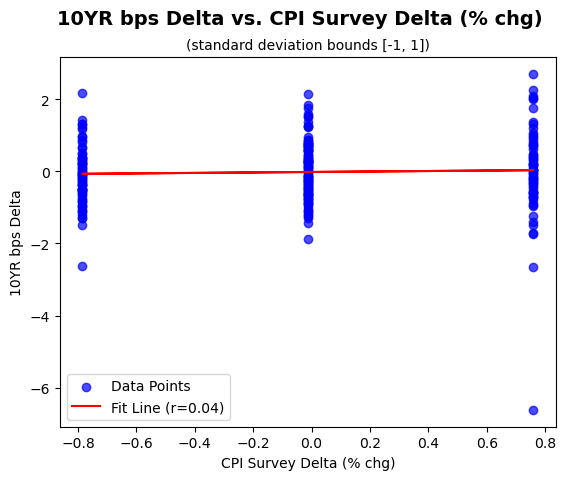

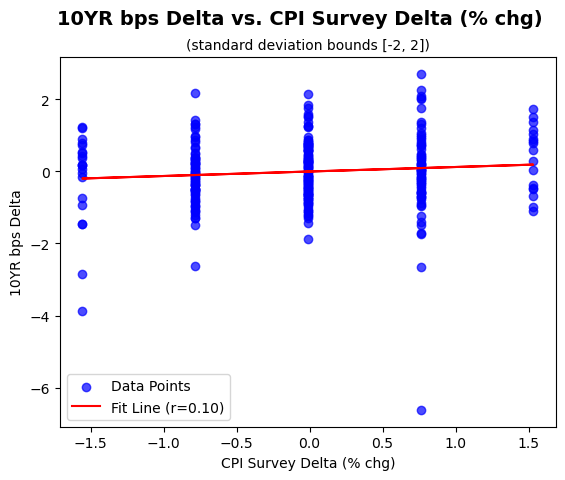

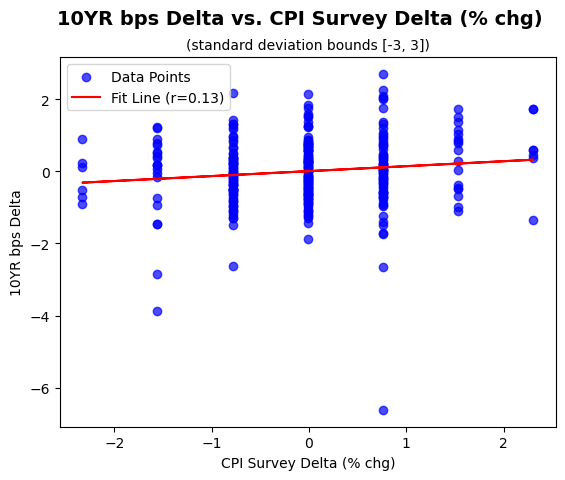

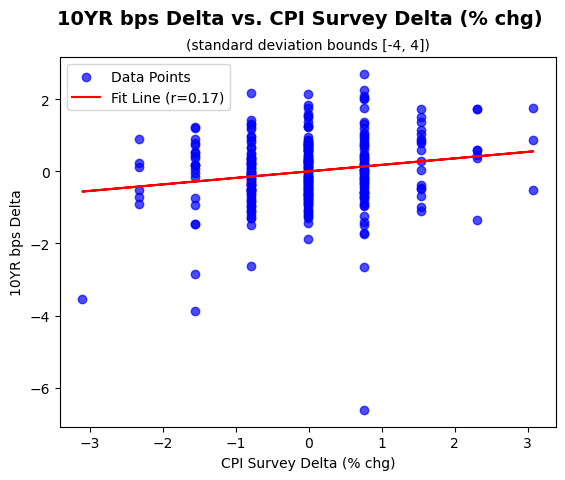

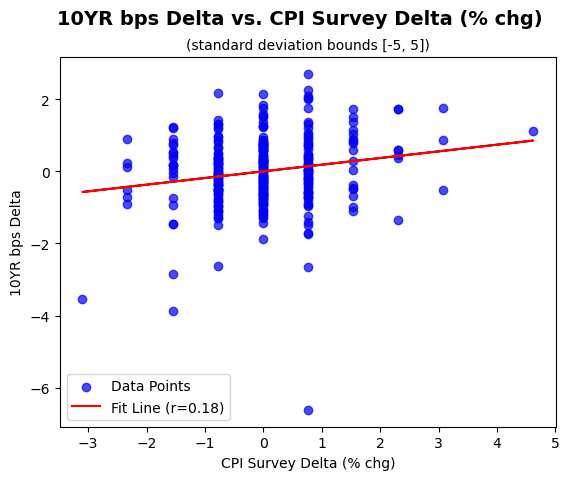

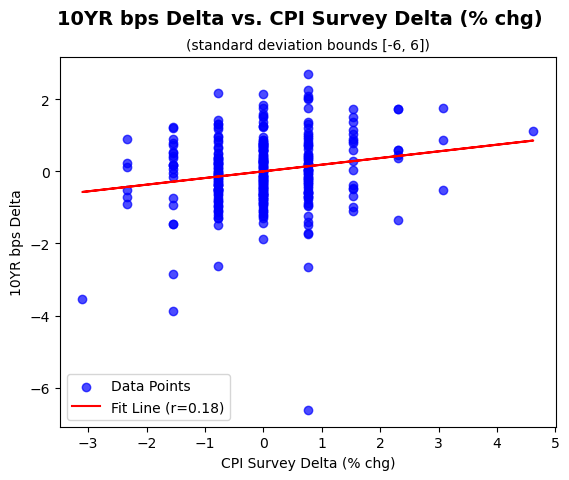

In [ ]:
# Analyzing 10Y Rates Delta vs CPI Survey Delta (% chg)
for x in range(1,7,1):
    scatter_plot(rates_st_df, 'CPI Survey Delta (% chg)', '10YR bps Delta', -x, x)

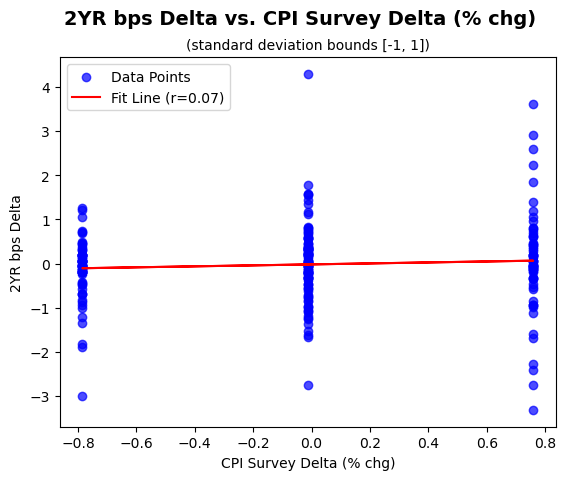

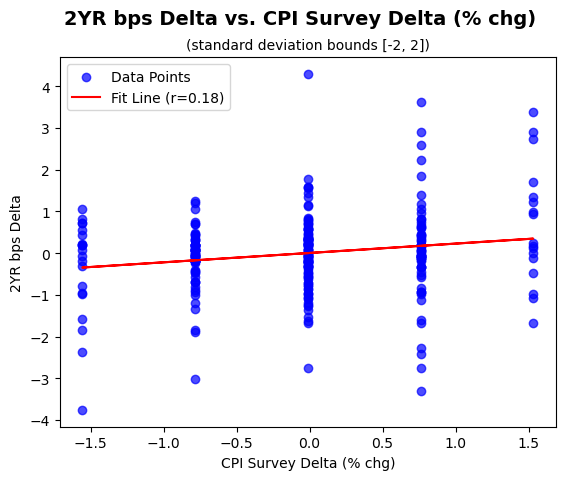

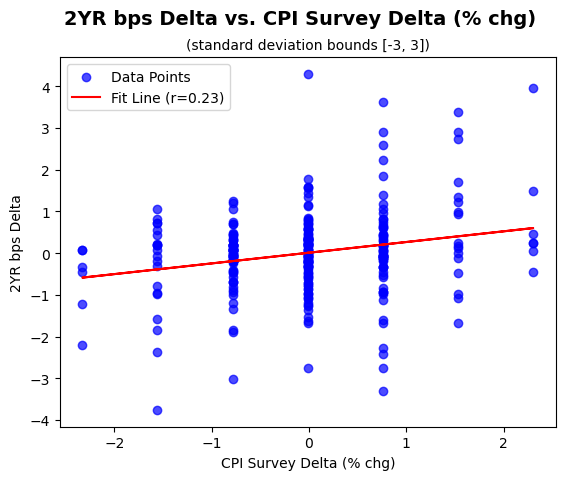

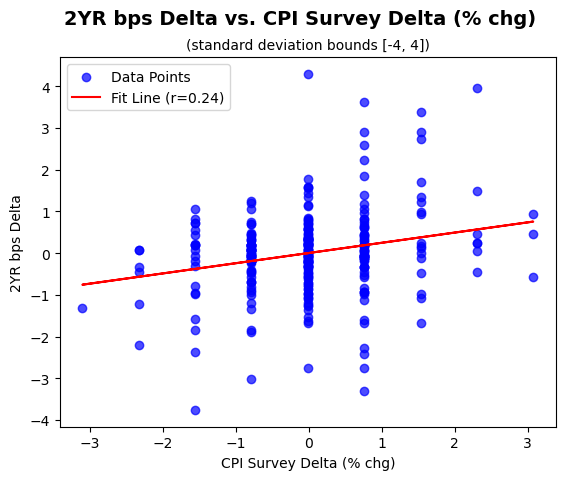

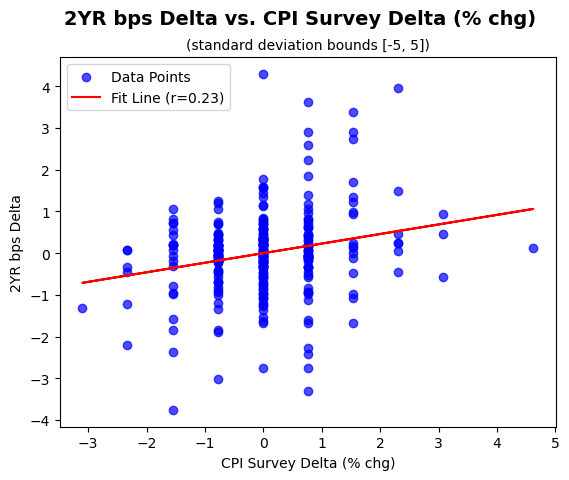

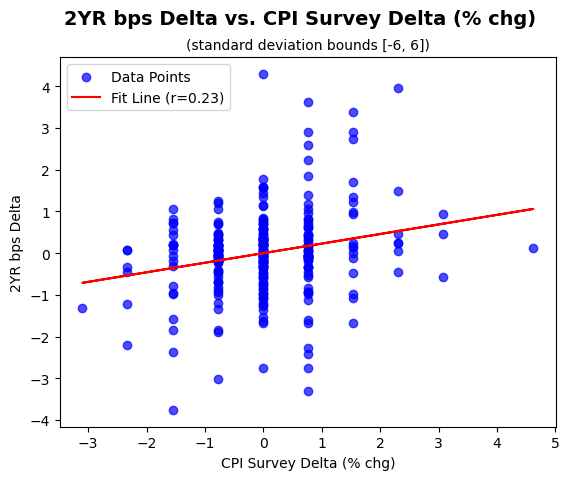

In [ ]:
# Analyzing 2Y Rates Delta vs CPI Survey Delta (% chg)
for x in range(1,7,1):
    scatter_plot(rates_st_df, 'CPI Survey Delta (% chg)', '2YR bps Delta', -x, x)

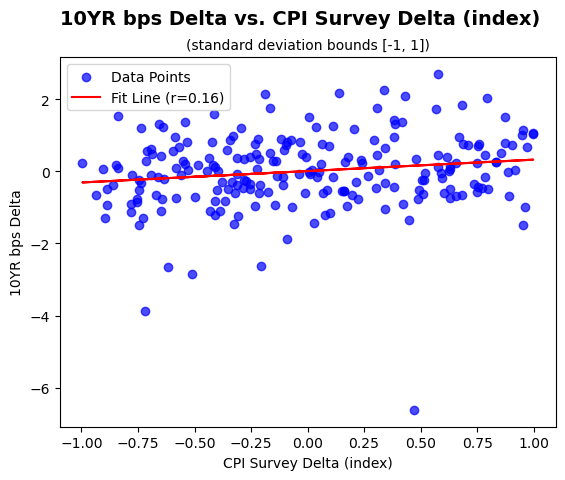

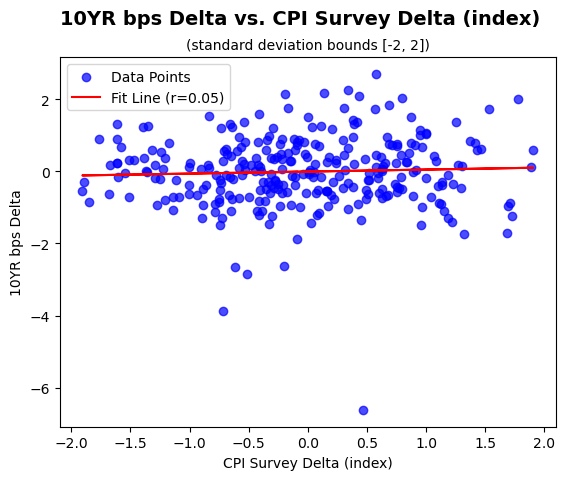

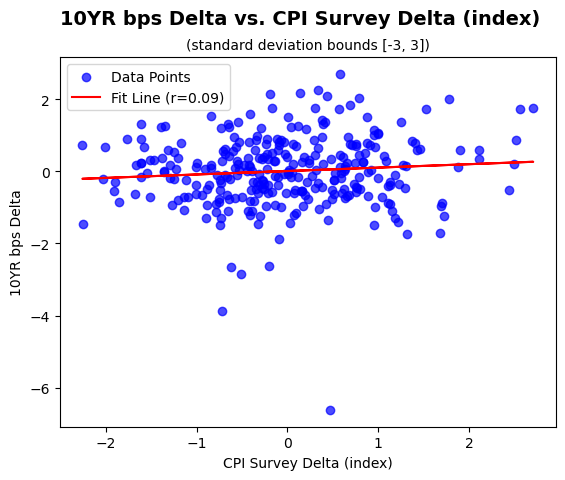

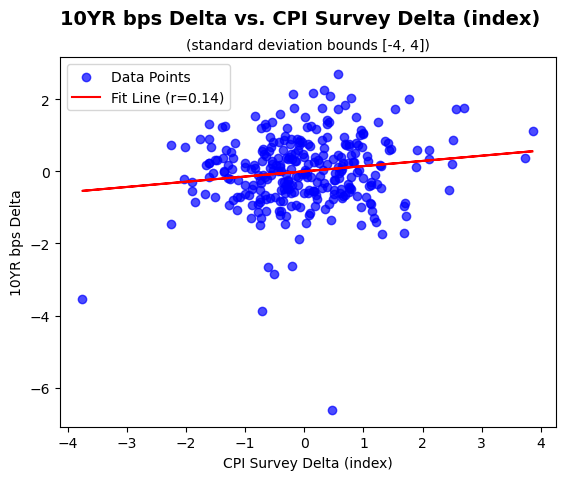

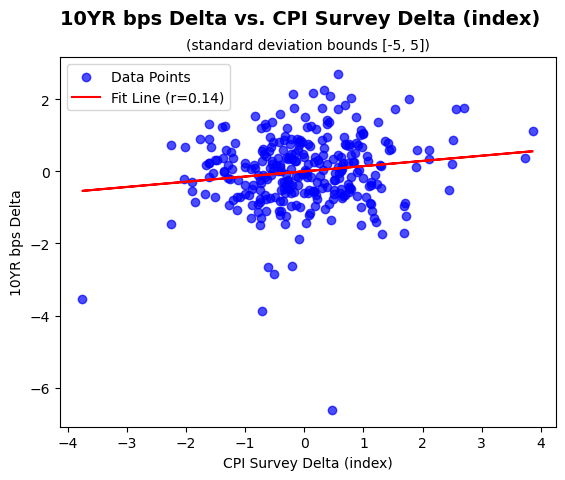

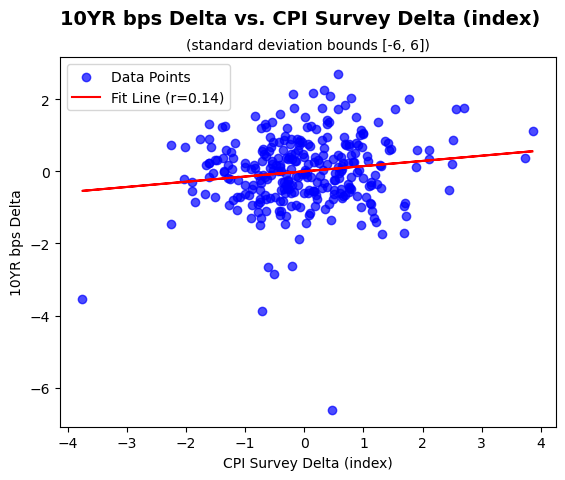

In [ ]:
# Analyzing 10Y Rates Delta vs CPI Survey Delta (index)
for x in range(1,7,1):
    scatter_plot(rates_st_df, 'CPI Survey Delta (index)', '10YR bps Delta', -x, x)

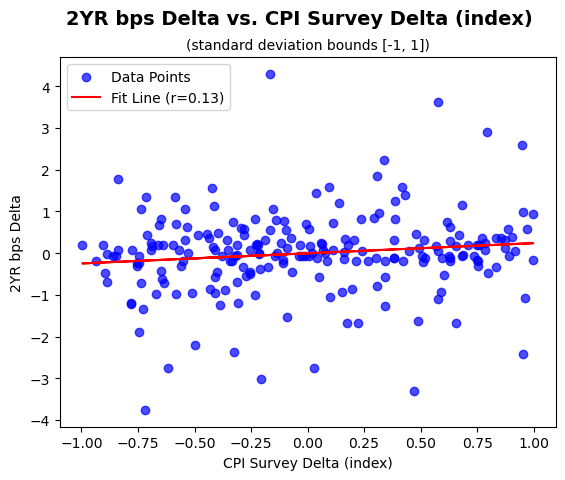

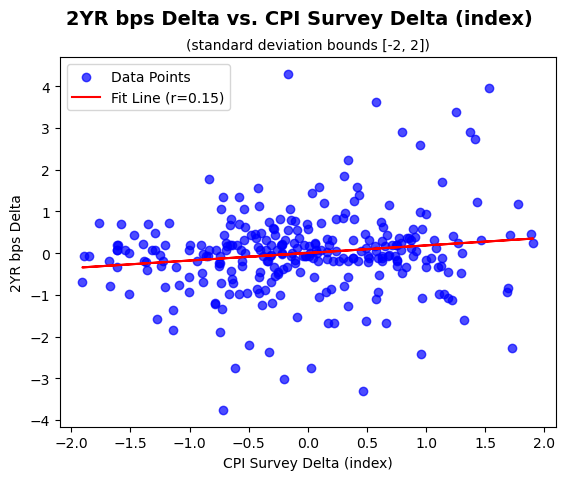

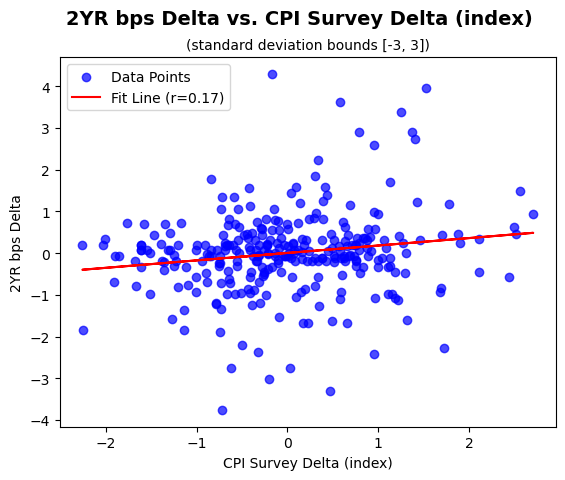

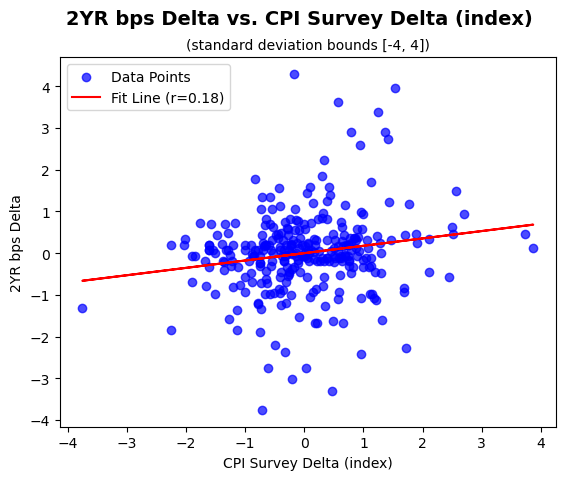

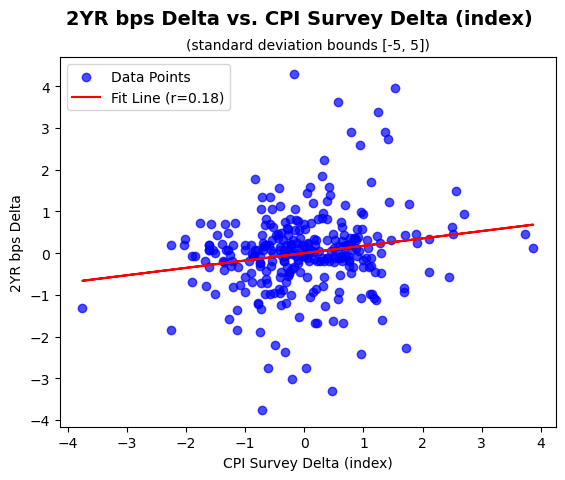

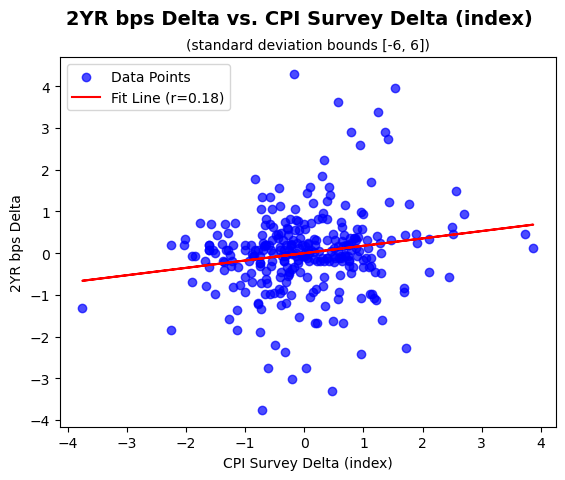

In [ ]:
# Analyzing 2Y Rates Delta vs CPI Survey Delta (index)
for x in range(1,7,1):
    scatter_plot(rates_st_df, 'CPI Survey Delta (index)', '2YR bps Delta', -x, x)

## Swaps vs CPI Analysis

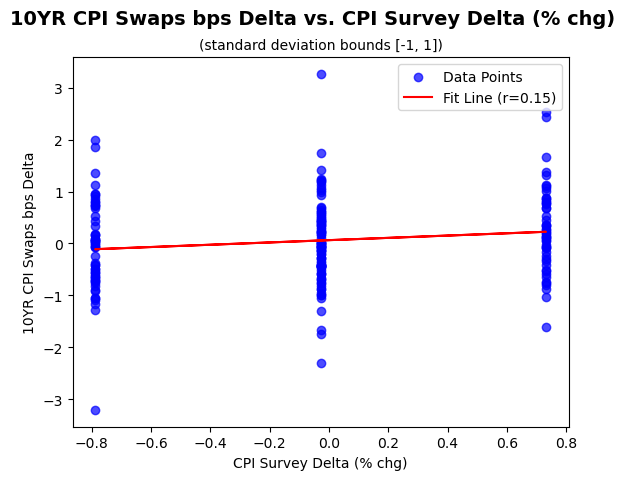

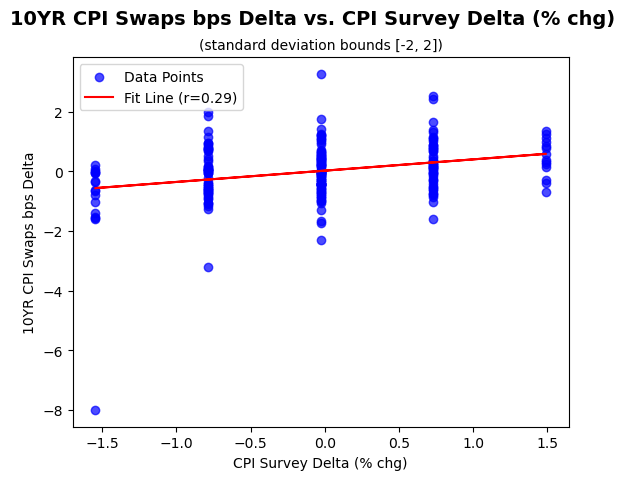

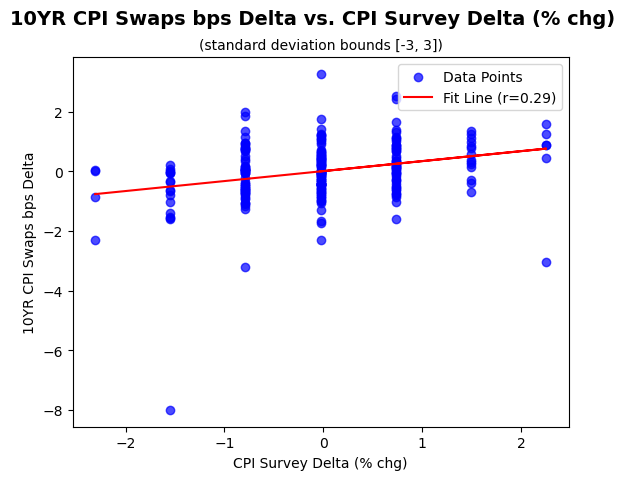

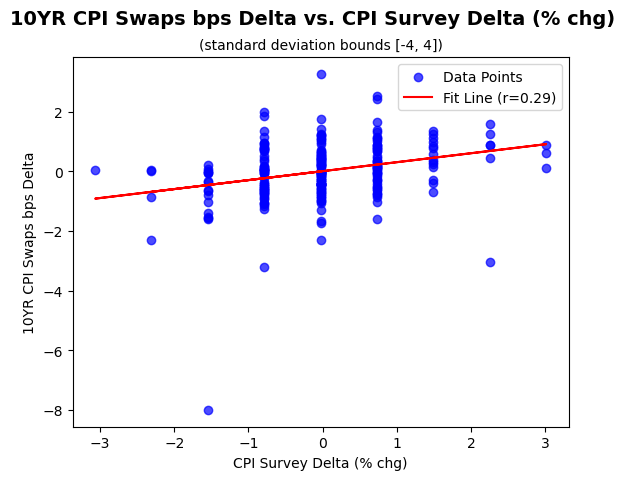

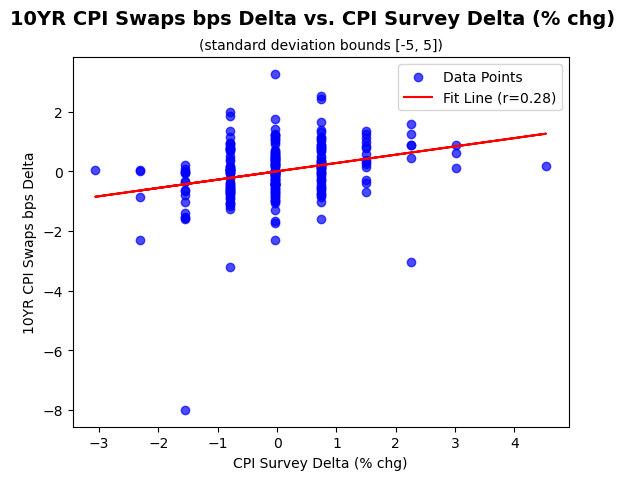

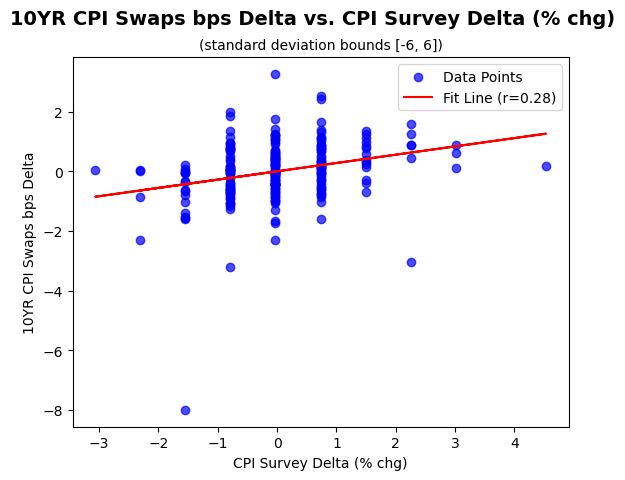

In [ ]:
# Analyzing 10YR CPI Swaps Delta vs CPI Survey Delta (% chg)
for x in range(1,7,1):
    scatter_plot(swaps_st_df, 'CPI Survey Delta (% chg)', '10YR CPI Swaps bps Delta', -x, x)

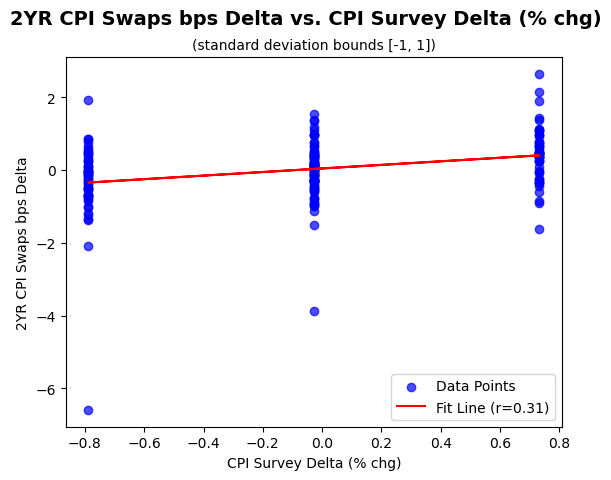

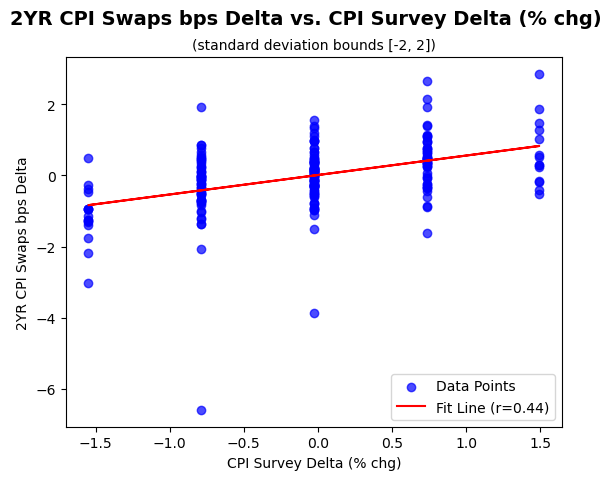

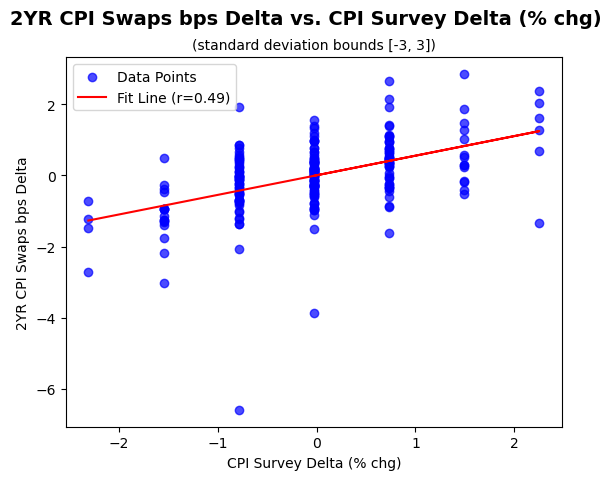

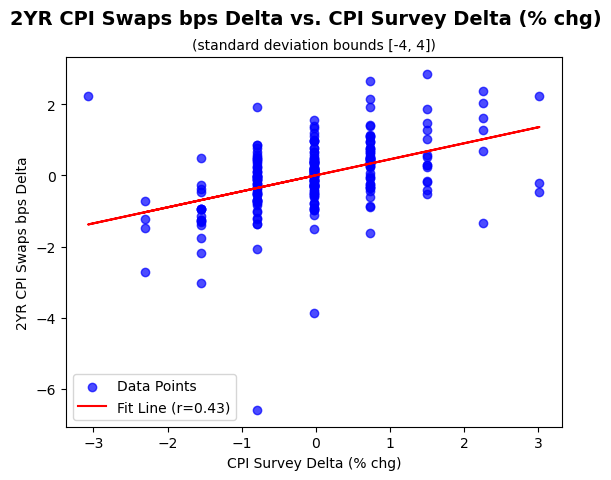

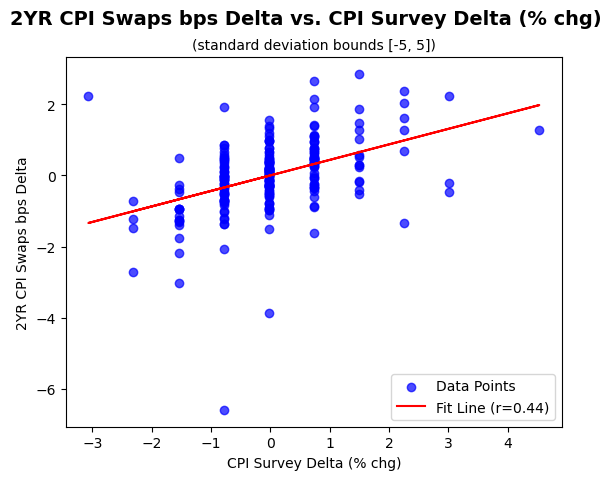

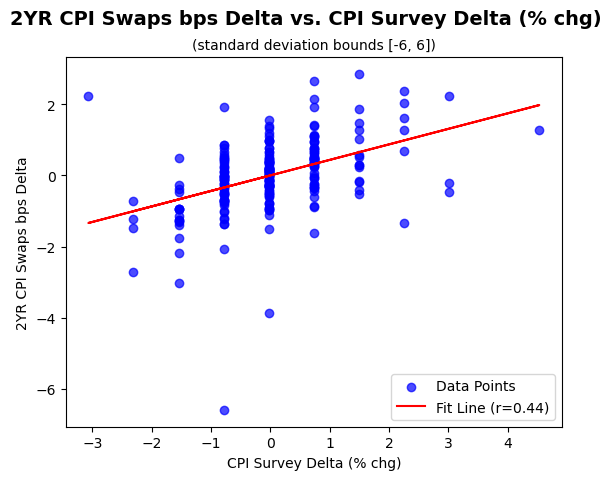

In [ ]:
# Analyzing 2YR CPI Swaps Delta vs CPI Survey Delta (% chg)
for x in range(1,7,1):
    scatter_plot(swaps_st_df, 'CPI Survey Delta (% chg)', '2YR CPI Swaps bps Delta', -x, x)

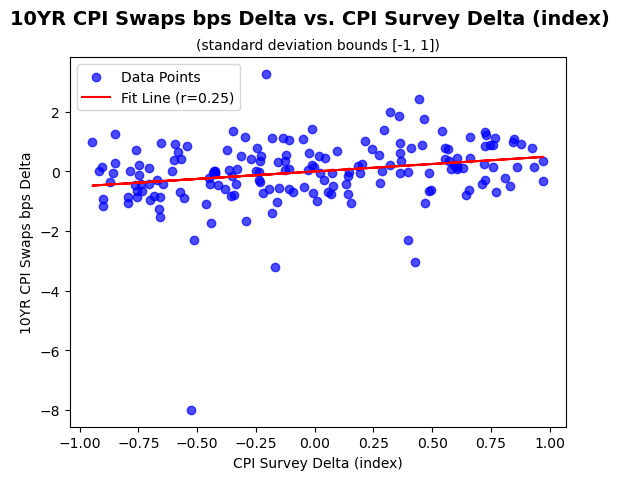

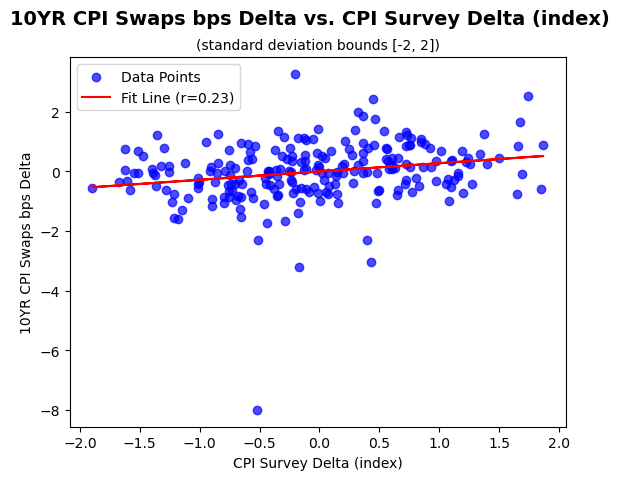

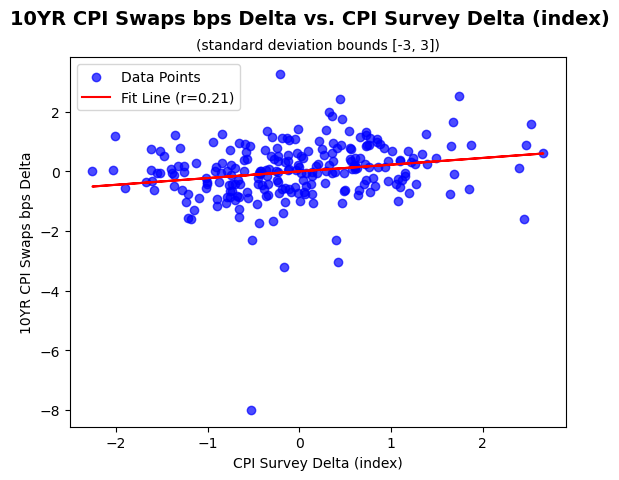

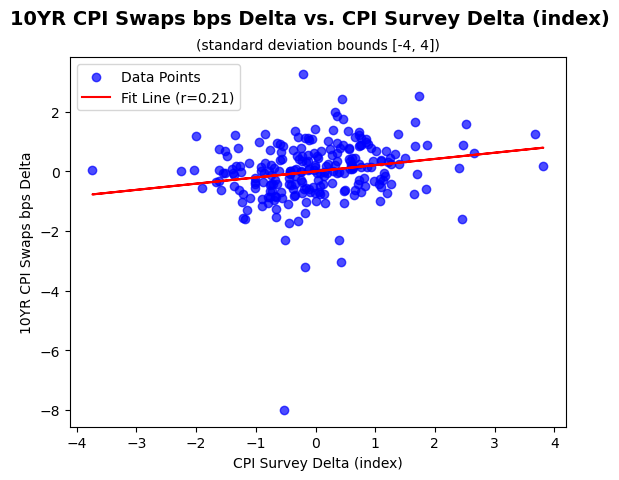

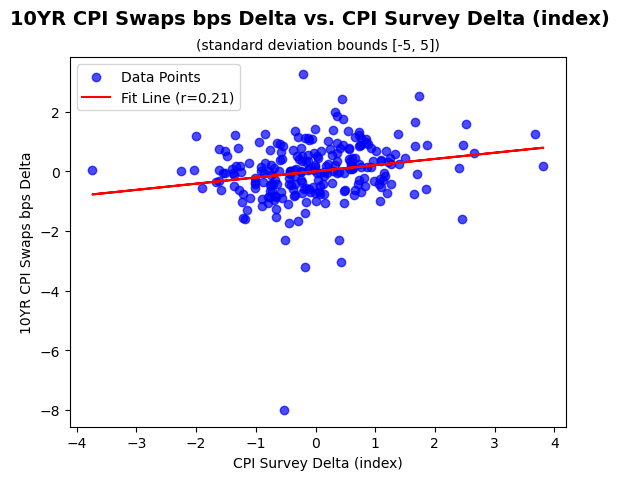

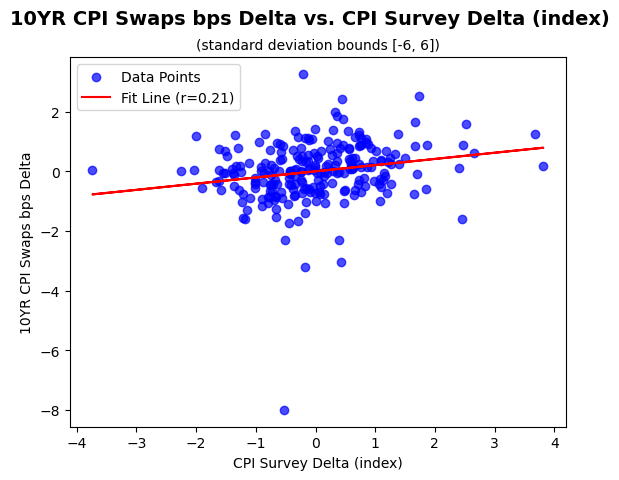

In [ ]:
# Analyzing 10YR CPI Swaps Delta vs CPI Survey Delta (index)
for x in range(1,7,1):
    scatter_plot(swaps_st_df, 'CPI Survey Delta (index)', '10YR CPI Swaps bps Delta', -x, x)

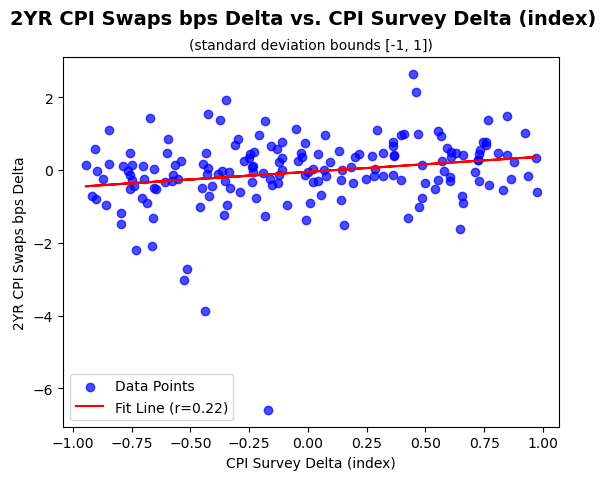

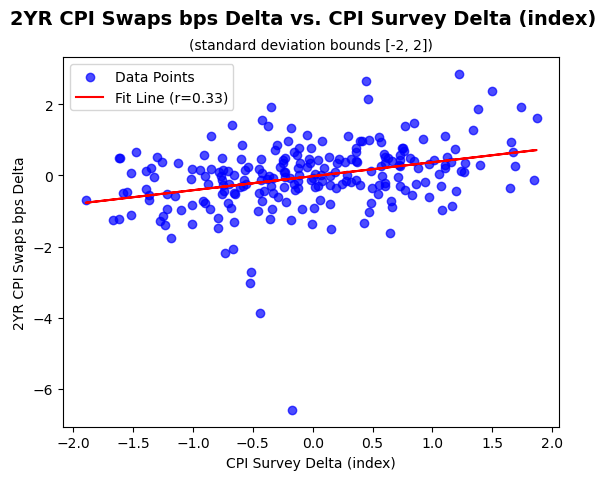

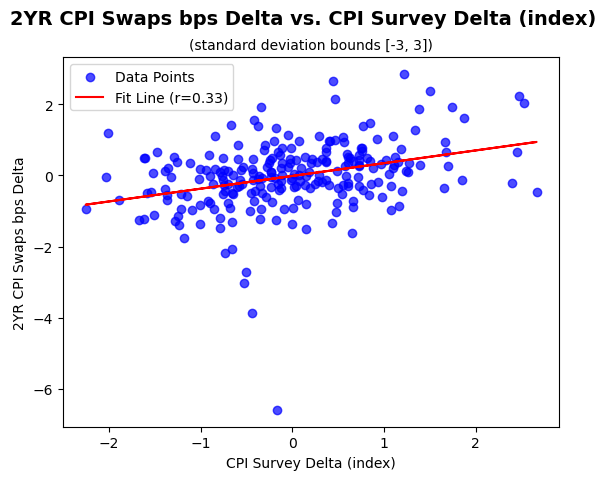

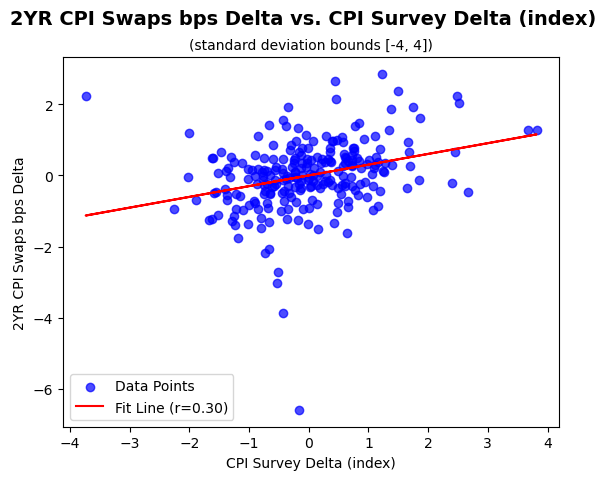

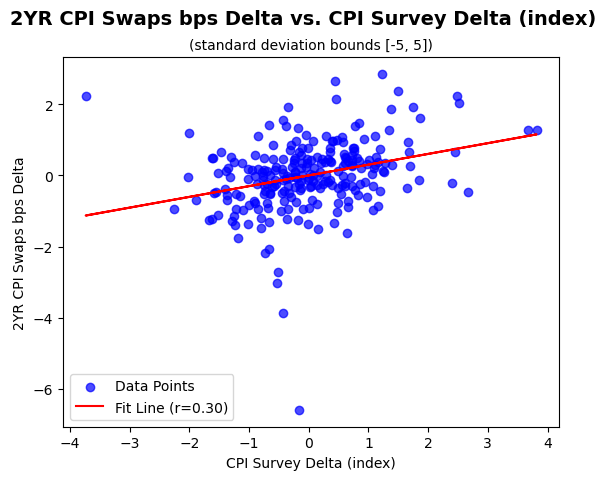

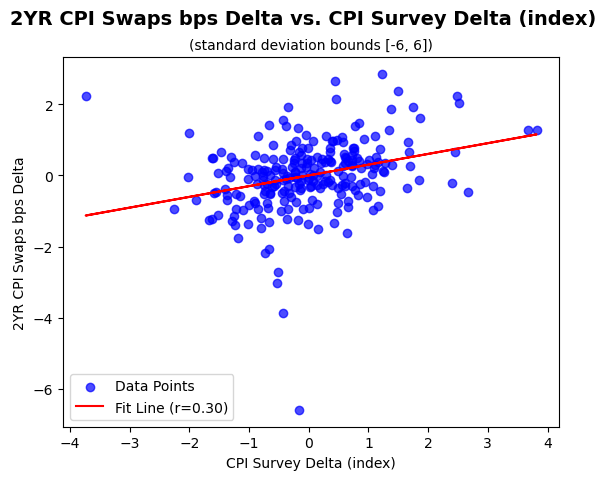

In [ ]:
# Analyzing 2YR CPI Swaps Delta vs CPI Survey Delta (index)
for x in range(1,7,1):
    scatter_plot(swaps_st_df, 'CPI Survey Delta (index)', '2YR CPI Swaps bps Delta', -x, x)